### Homework 4

In [1]:
pwd

'C:\\Users\\Baron\\Desktop\\EE_258_Repo\\EE_258\\ML_PATH_EE258\\EE258_env\\homework\\HW4'

### Basic Imports from the libraries
    Also prints out the version of the library installed in python

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

print("Tensorflow Version:", tf.__version__)
#print("Keras Version:", keras.__version__)

Tensorflow Version: 2.13.0


### Loads the Dataset from the MNIST Library
    Loads it in terms of training and testing pools. 
    Also prints out the shape information of the newly created variables


In [3]:
from keras.datasets import mnist

(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

print('Xtrain', type(Xtrain), Xtrain.shape)
print('Xtest', type(Xtest), Xtest.shape)
print('ytrain', type(ytrain), ytrain.shape)
print('ytest', type(ytest), ytest.shape)


Xtrain = Xtrain.reshape(len(Xtrain), 28*28)
Xtest = Xtest.reshape(len(Xtest), 28*28)

print('Xtrain', type(Xtrain), Xtrain.shape)
print('Xtest', type(Xtest), Xtest.shape)
print('ytrain', type(ytrain), ytrain.shape)
print('ytest', type(ytest), ytest.shape)



Xtrain <class 'numpy.ndarray'> (60000, 28, 28)
Xtest <class 'numpy.ndarray'> (10000, 28, 28)
ytrain <class 'numpy.ndarray'> (60000,)
ytest <class 'numpy.ndarray'> (10000,)
Xtrain <class 'numpy.ndarray'> (60000, 784)
Xtest <class 'numpy.ndarray'> (10000, 784)
ytrain <class 'numpy.ndarray'> (60000,)
ytest <class 'numpy.ndarray'> (10000,)


### Visualize an example from the MNIST 28x28 Dataset:
    The code below plots the second number in the image dataset.
    Per the homework, the index was changed to portray a different number, and that number 
    is 4
    

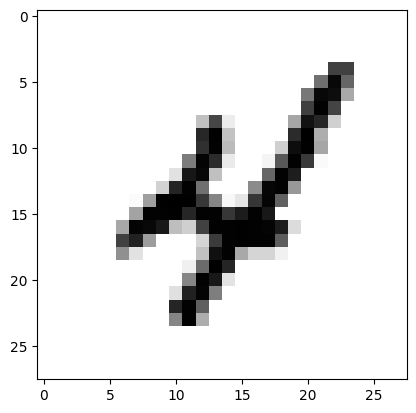

In [4]:
plt.imshow(Xtrain[9].reshape(28,28), cmap = plt.cm.binary, interpolation = 'nearest') 
plt.show()

### The below code analyzes and visualizes the distribution of digit labels in your training dataset (ytrain) — for example, how many times each digit (0–9) appearsand then graphs it.

distribution of train data: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
distribution of test data {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


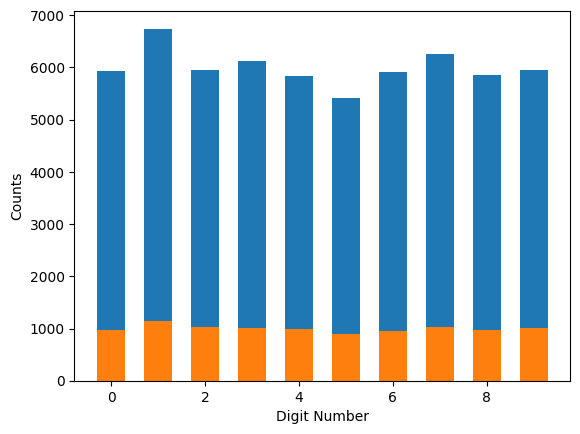

In [13]:
digit_train, counts_train = np.unique(ytrain, return_counts = True)
digit_test, counts_test = np.unique(ytest, return_counts= True)


distribution_train = dict(zip(digit_train, counts_train))
print("distribution of train data:", distribution_train )

distribution_test = dict(zip(digit_test, counts_test))
print("distribution of test data", distribution_test)

plt.bar(list(distribution_train.keys()),distribution_train.values(),width =0.6)
plt.xlabel('Digit Number')
plt.ylabel('Counts')

plt.bar(list(distribution_test.keys()),distribution_test.values(),width =0.6)
plt.xlabel('Digit Number')
plt.ylabel('Counts')


plt.show()

### This asserts the train and test split of the MNIST Dataset. 

In [23]:
#test size 1/12 = 55k train / 5k test
#test size = 1/6 = 50k train / 5k test

X_train, X_val, y_train, y_val  = train_test_split(Xtrain, ytrain, test_size = 1/6, random_state = 42)
print(X_train.shape, X_val.shape)
print(y_train, y_val)

(50000, 784) (10000, 784)
[8 5 1 ... 0 0 4] [7 3 8 ... 9 8 1]


### This portion of the code sets up the infrastructure of the Nueral Network

In [6]:
## READ "Implementing MLPs with Keras" on Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow 
#(pages 295-308)
from tensorflow.keras.optimizers import SGD

model = keras. models.Sequential()
model.add(keras.layers.Dense(300, activation ="relu"))
model.add(keras.layers.Dense(300, activation ="relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))


sgd = SGD(learning_rate=0.001)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train = X_train.astype('float32')/255.0
y_train = y_train.astype('uint')
X_val = X_val.astype('float32')/255.0
y_val = y_val.astype('uint')



2025-03-31 15:09:06.215387: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.fit(X_train, y_train, batch_size=10, epochs=5, validation_data =(X_val,y_val))


Epoch 1/5
5500/5500 [==============================] - 10s 2ms/step - loss: 1.0770 - accuracy: 0.7531 - val_loss: 0.5238 - val_accuracy: 0.8640
Epoch 2/5
5500/5500 [==============================] - 10s 2ms/step - loss: 0.4283 - accuracy: 0.8882 - val_loss: 0.3732 - val_accuracy: 0.8942
Epoch 3/5
5500/5500 [==============================] - 13s 2ms/step - loss: 0.3448 - accuracy: 0.9045 - val_loss: 0.3229 - val_accuracy: 0.9070
Epoch 4/5
5500/5500 [==============================] - 14s 2ms/step - loss: 0.3063 - accuracy: 0.9152 - val_loss: 0.2968 - val_accuracy: 0.9154
Epoch 5/5
5500/5500 [==============================] - 14s 2ms/step - loss: 0.2820 - accuracy: 0.9212 - val_loss: 0.2720 - val_accuracy: 0.9224


In [ ]:
model.summary()

In [ ]:
X_test = Xtest.astype('float32')/255.0
y_test = ytest.astype('uint')


loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)
     

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix



y_proba = model.predict(X_test) 
y_pred = np.argmax(y_proba,axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('Classification Report')
print(classification_report(y_test, y_pred))
